In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,auc,roc_auc_score,roc_curve


from sklearn.externals import joblib

In [4]:
df=pd.read_csv('E:\\bank-full.csv',sep=';')
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    print(feature,df[feature].nunique())
    

job 12
marital 3
education 4
default 2
housing 2
loan 2
contact 3
month 12
poutcome 4


In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [7]:
df['y']=df['y'].replace(['yes','no'],[1,0])

In [8]:
df.shape

(45211, 17)

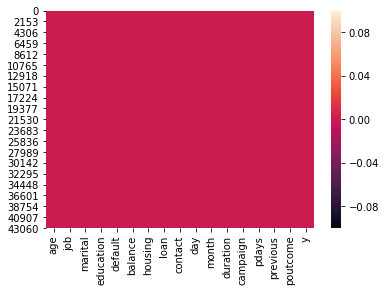

In [11]:
sns.heatmap(df.isnull())   #no missing value in dataset

In [12]:
df.isnull().sum()#no missing value in dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [17]:
df=pd.get_dummies(df)

In [18]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [19]:
df.shape

(45211, 52)

In [20]:
df.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_teleph

# EDA

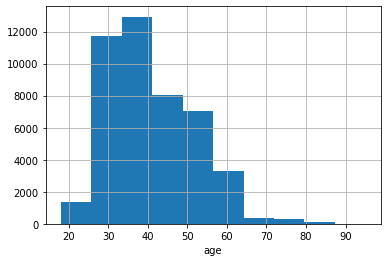

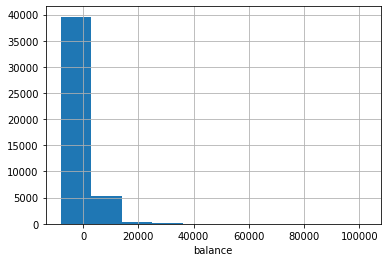

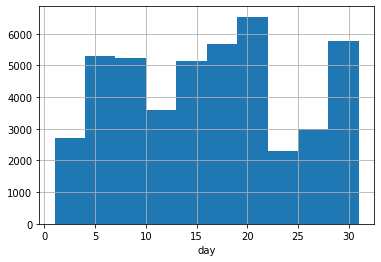

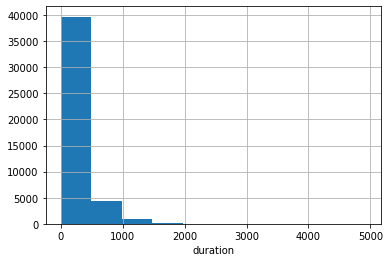

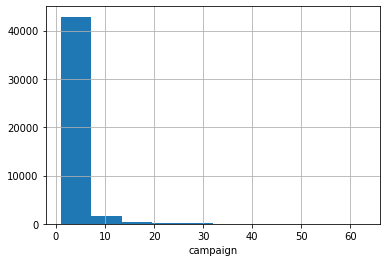

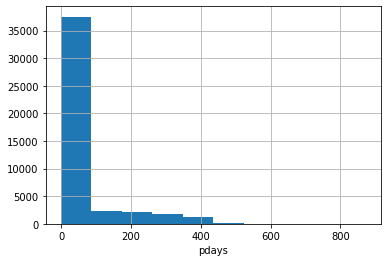

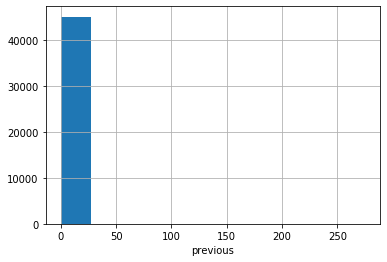

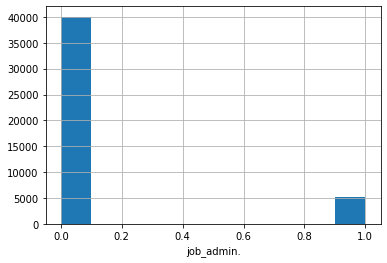

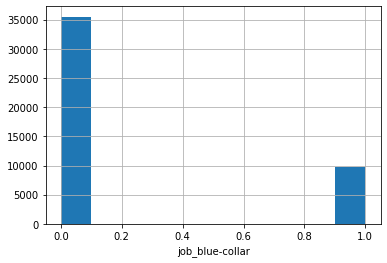

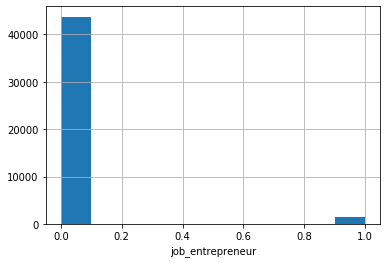

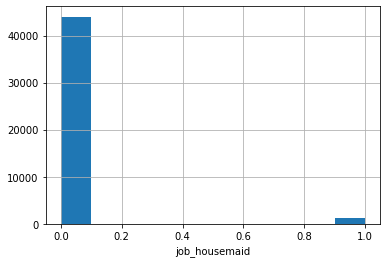

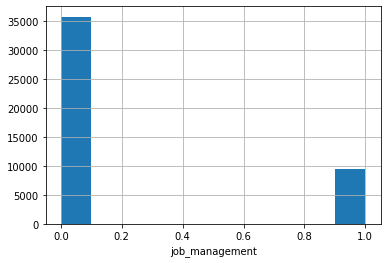

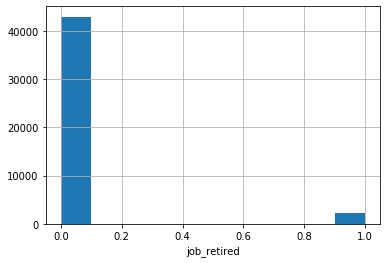

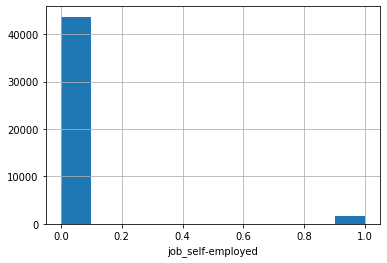

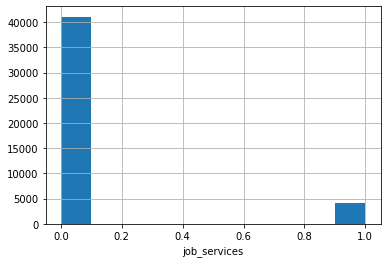

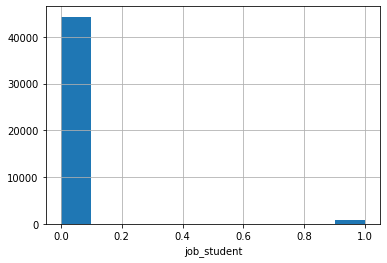

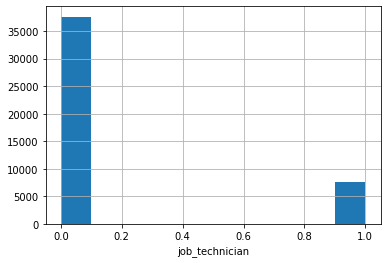

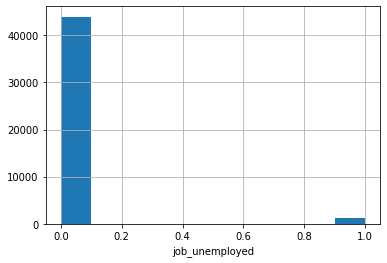

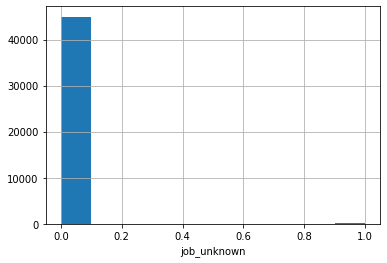

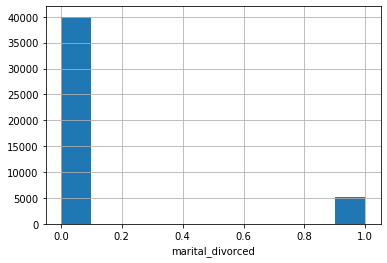

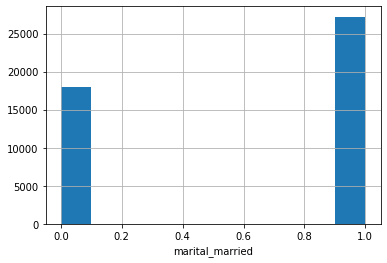

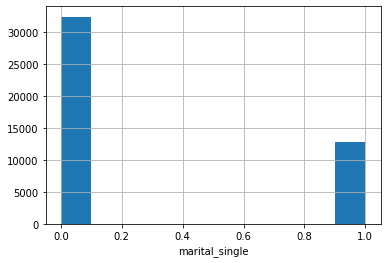

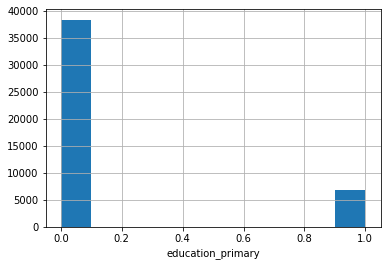

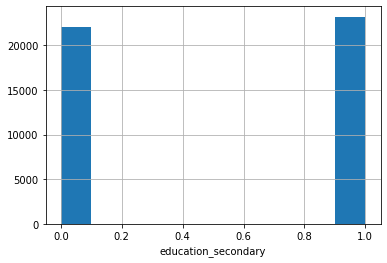

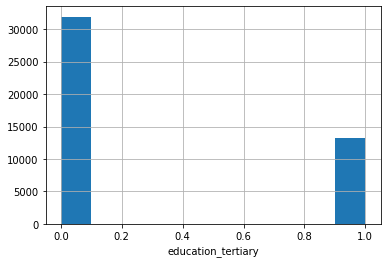

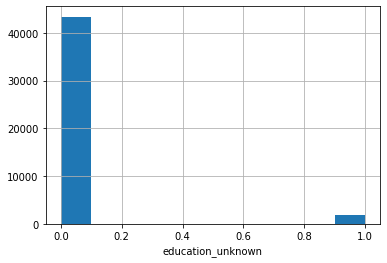

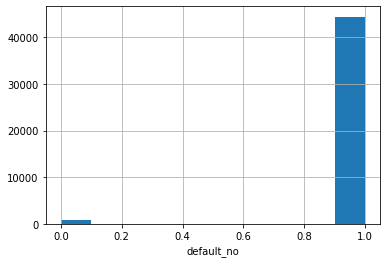

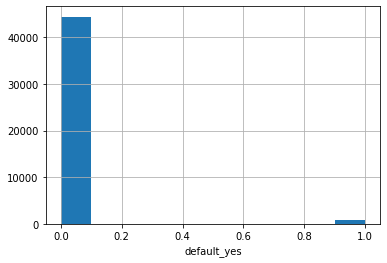

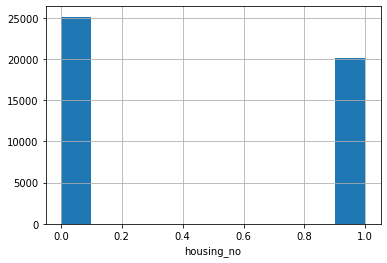

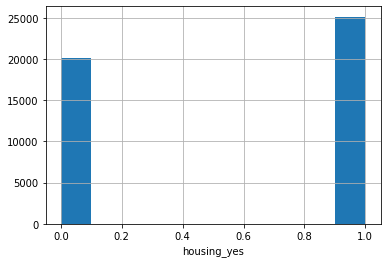

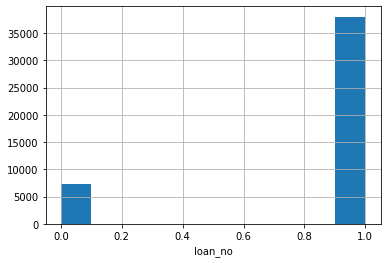

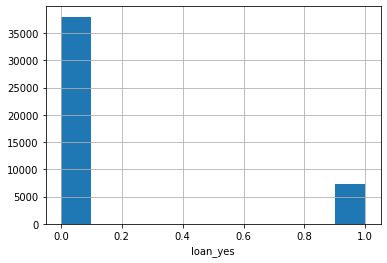

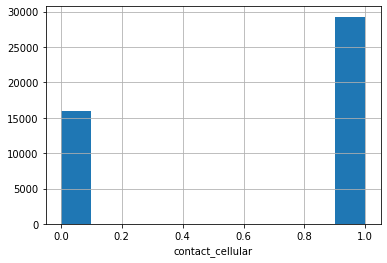

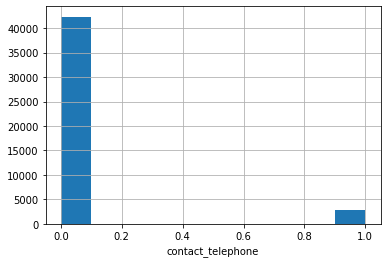

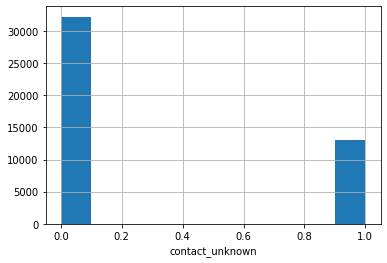

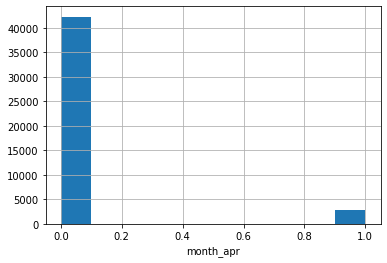

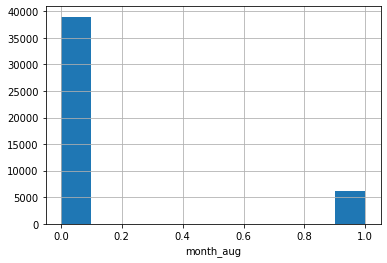

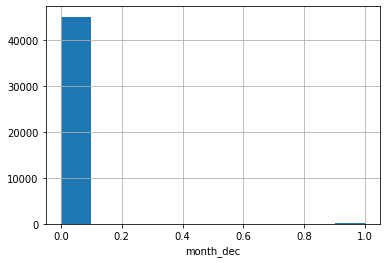

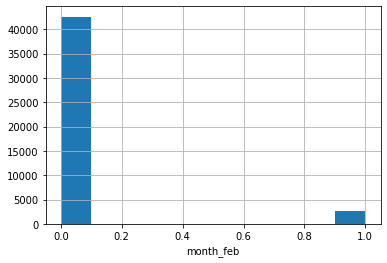

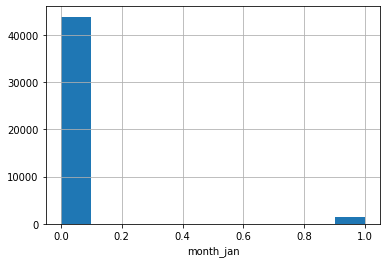

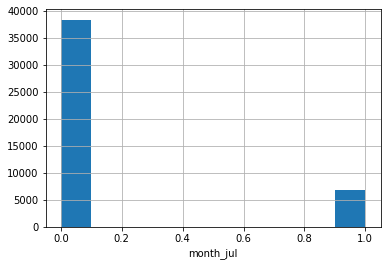

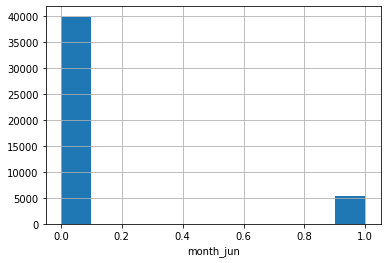

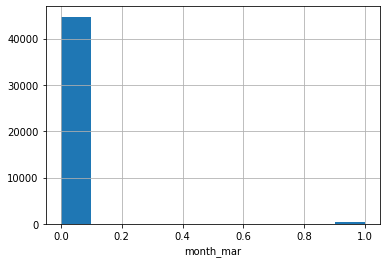

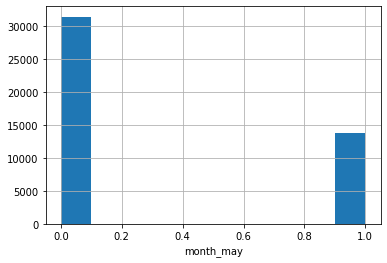

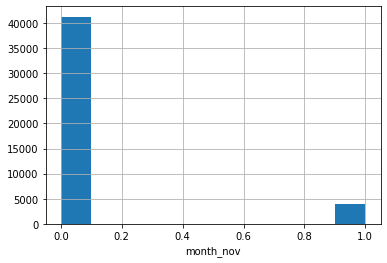

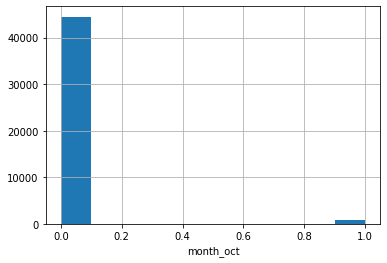

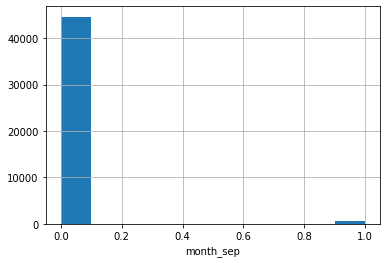

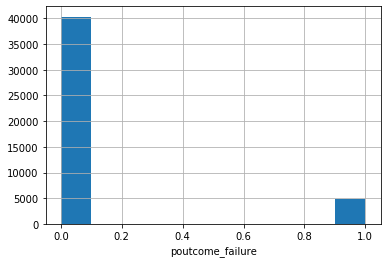

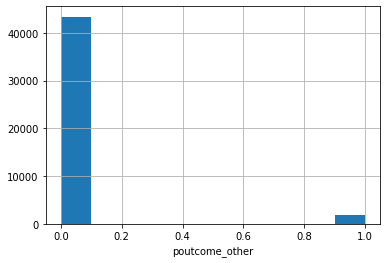

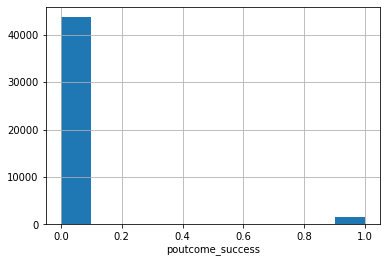

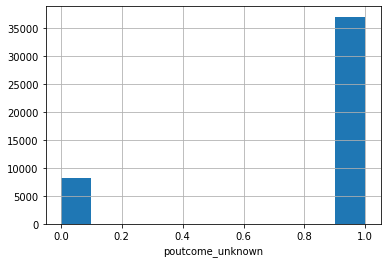

In [24]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='y':
        pass
    else:
    
        
        df[feature].hist()
        plt.xlabel(feature)
        plt.show()

In [22]:
#checking relation of each attribute w.r.t target attribute

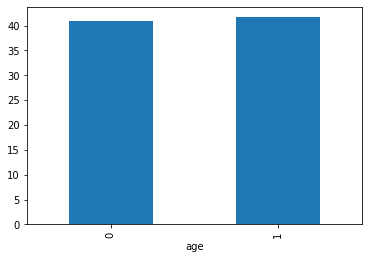

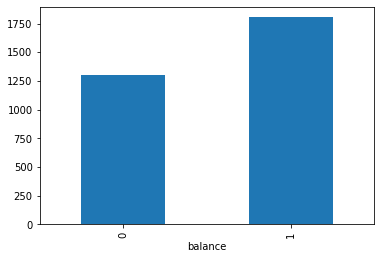

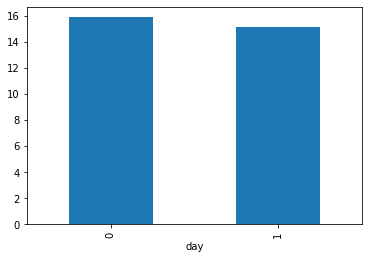

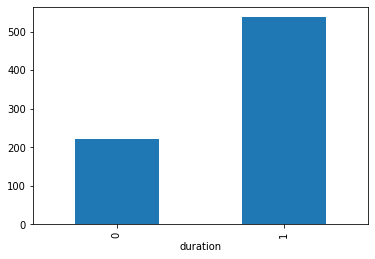

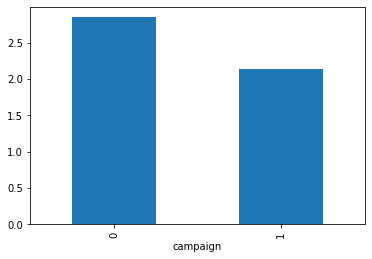

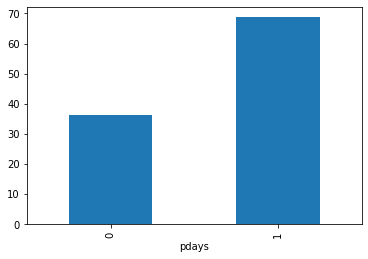

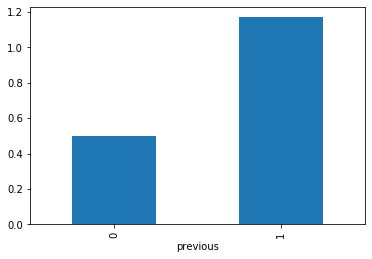

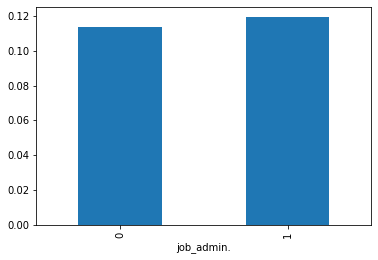

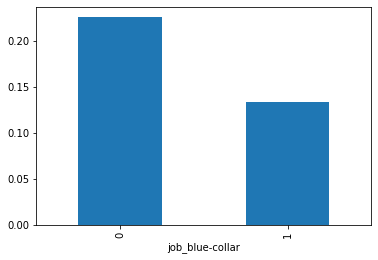

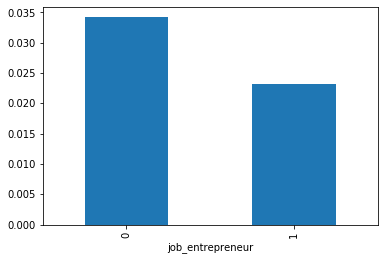

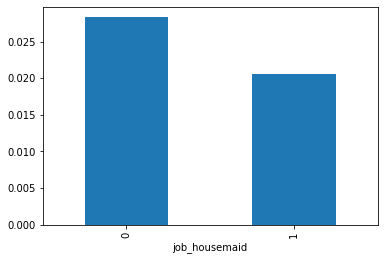

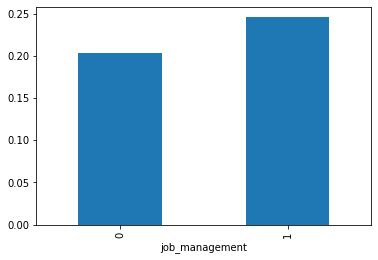

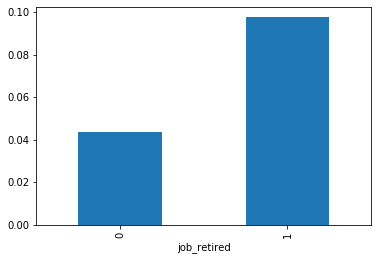

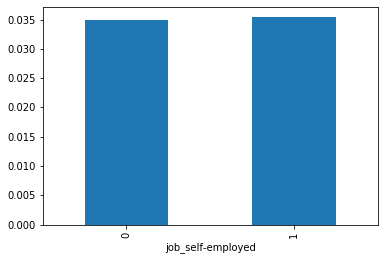

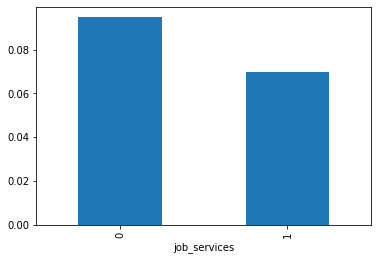

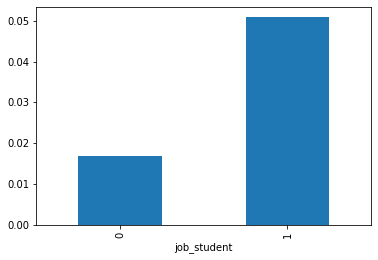

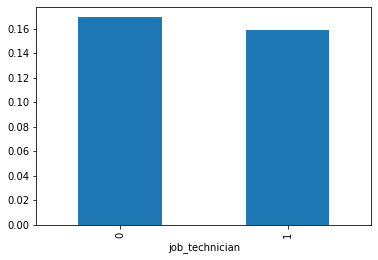

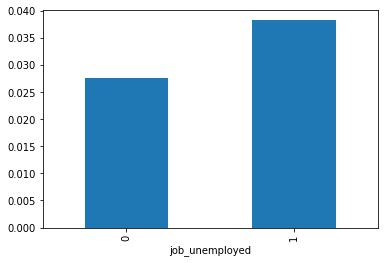

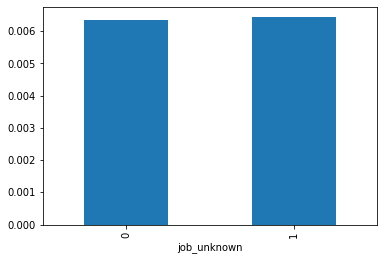

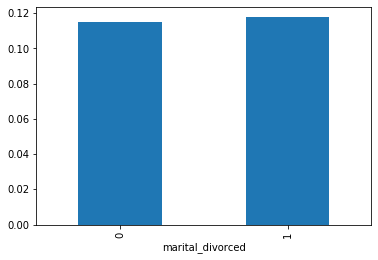

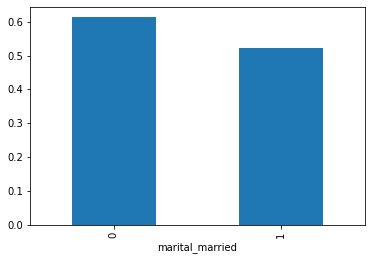

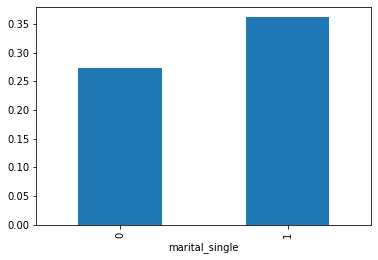

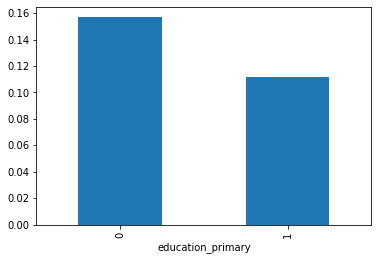

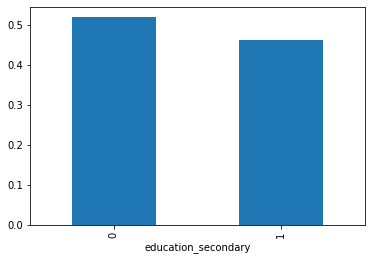

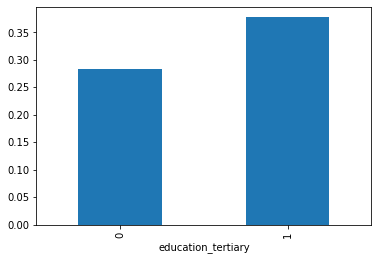

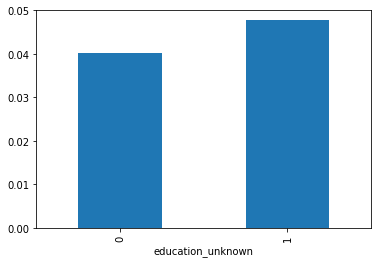

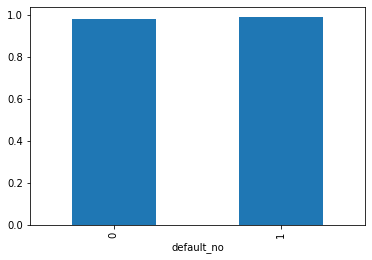

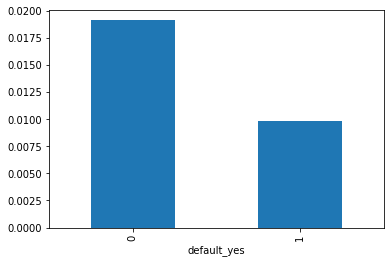

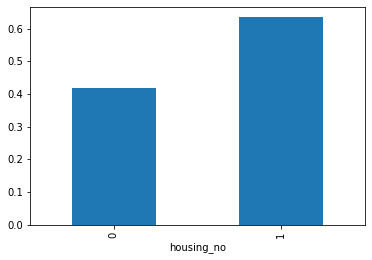

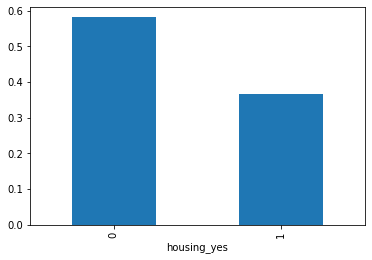

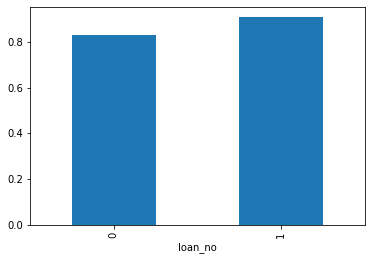

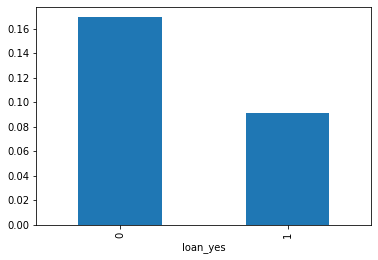

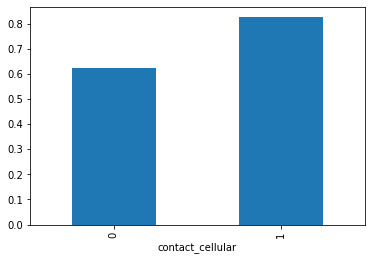

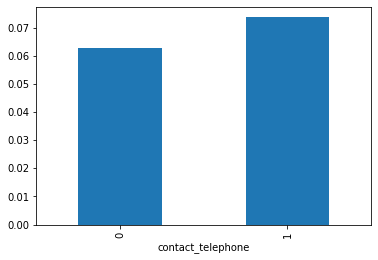

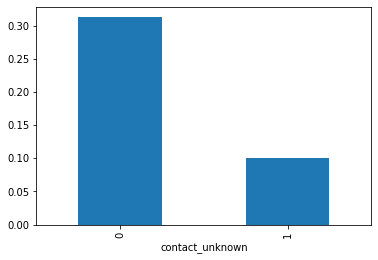

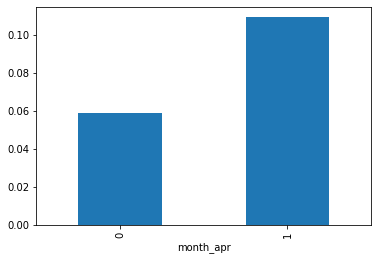

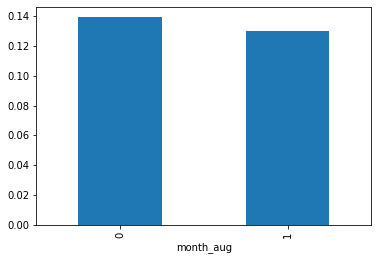

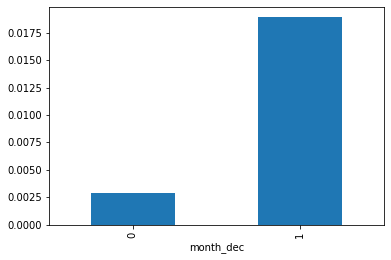

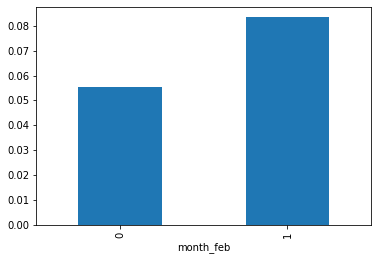

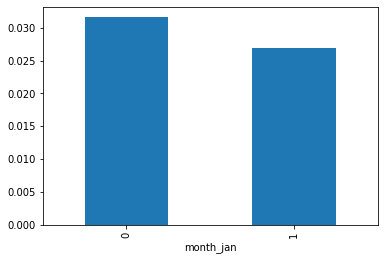

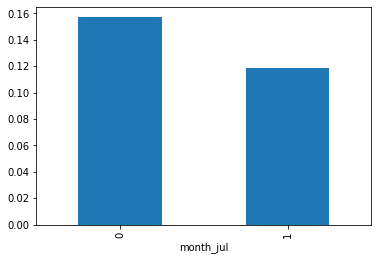

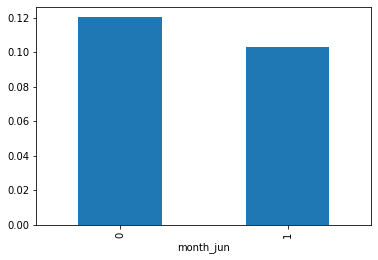

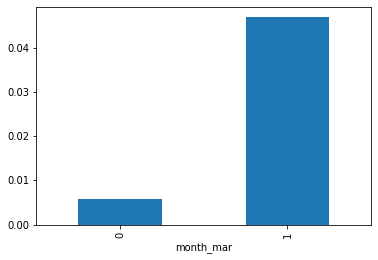

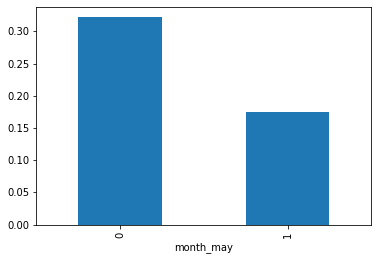

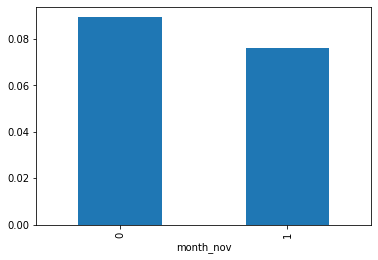

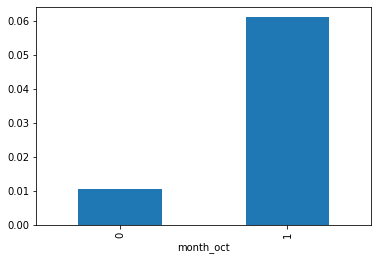

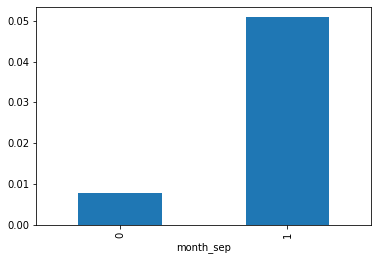

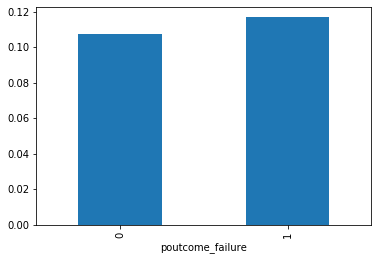

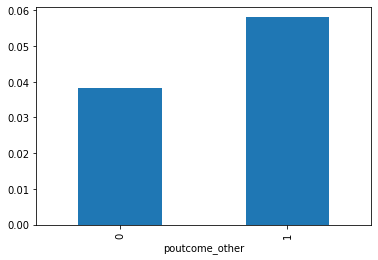

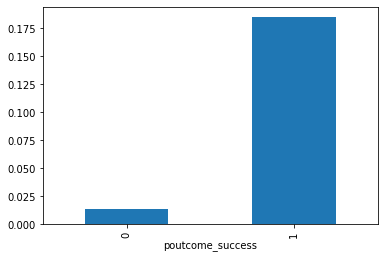

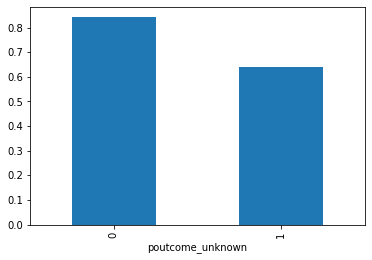

In [25]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='y':
        pass
    else:
    
        df.groupby('y')[feature].mean().plot.bar()
        plt.xlabel(feature)
        plt.show()


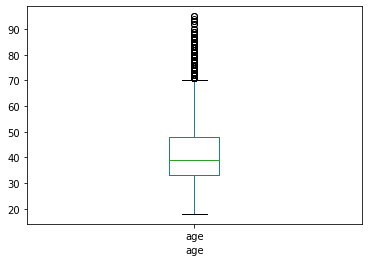

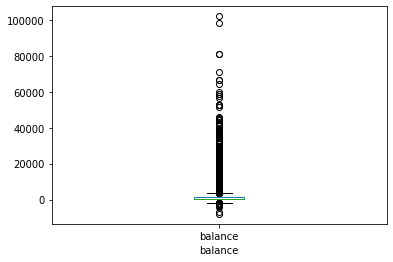

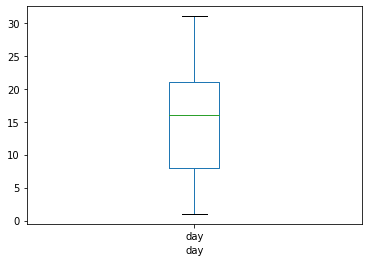

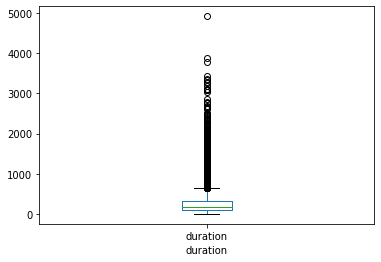

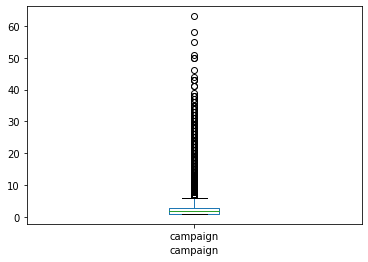

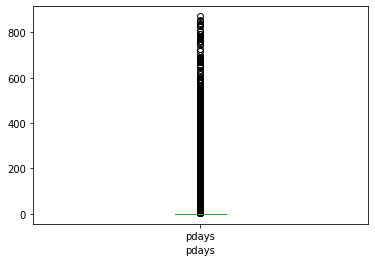

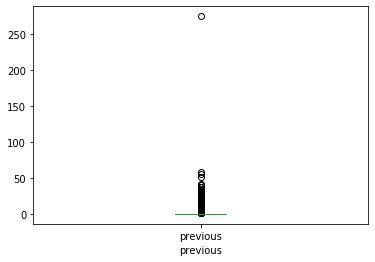

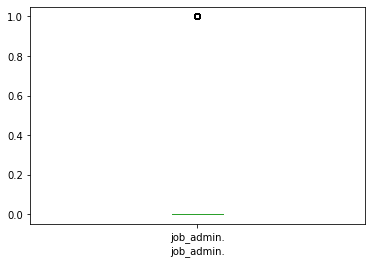

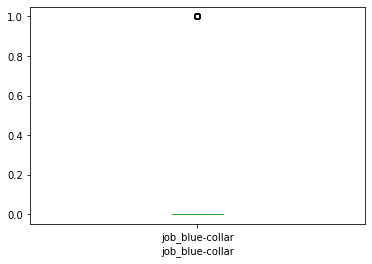

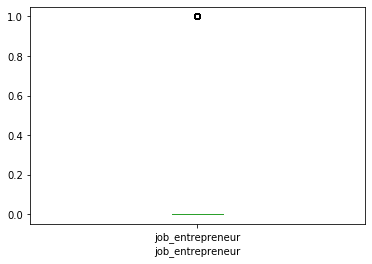

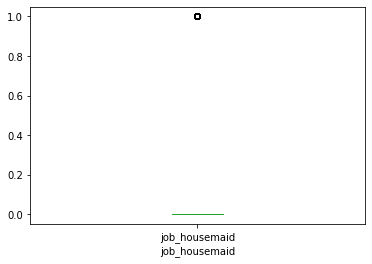

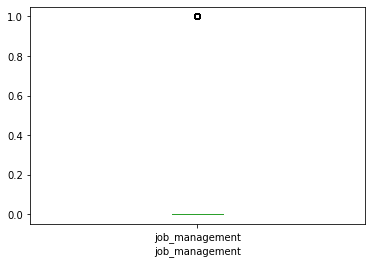

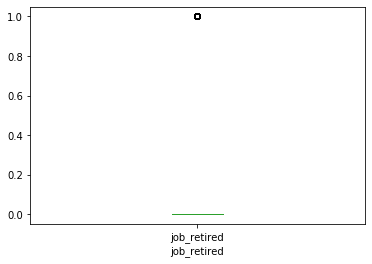

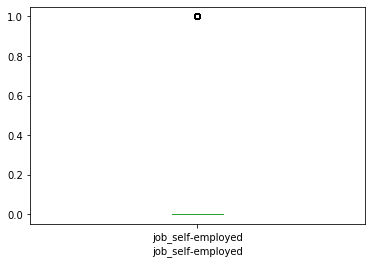

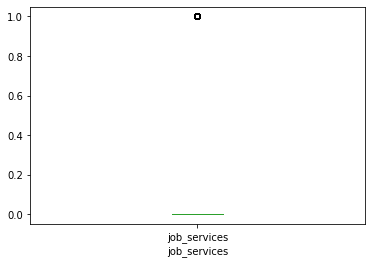

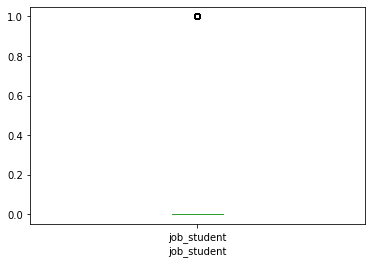

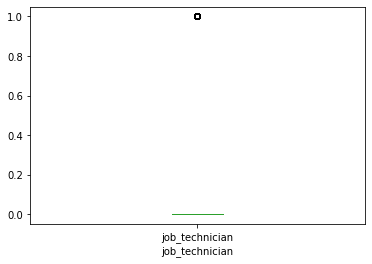

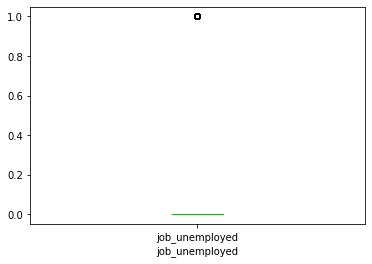

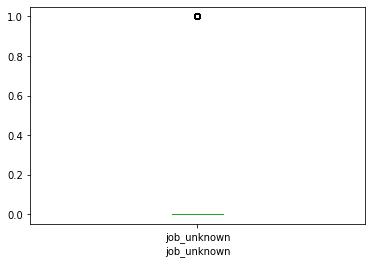

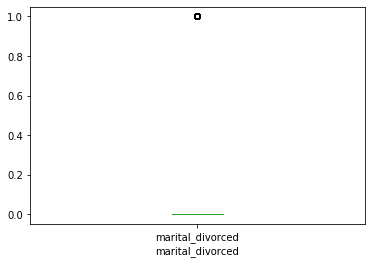

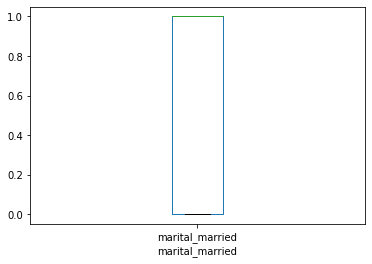

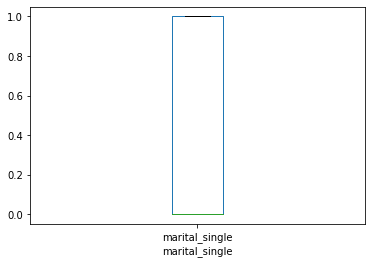

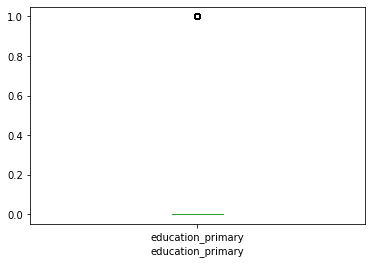

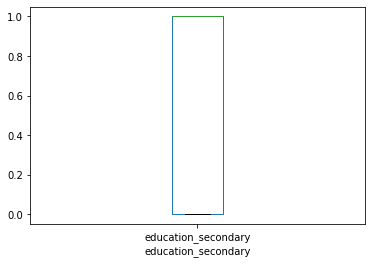

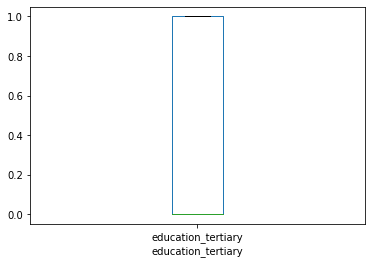

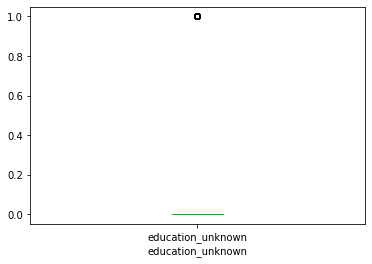

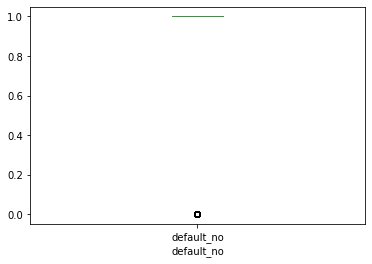

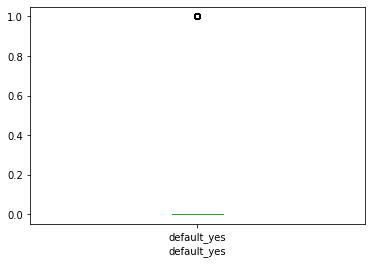

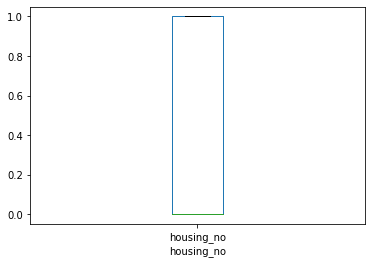

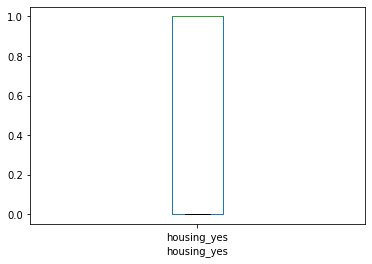

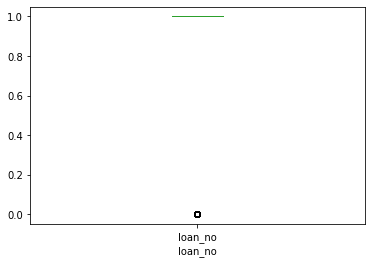

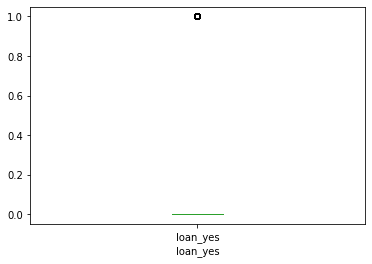

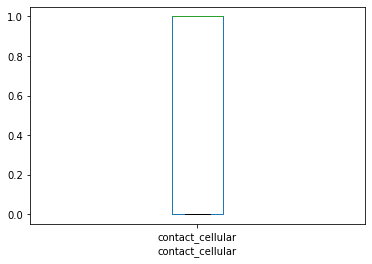

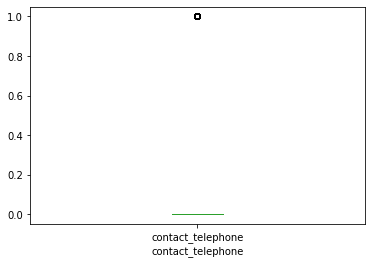

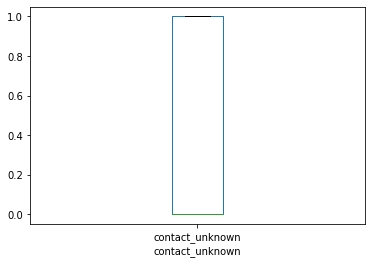

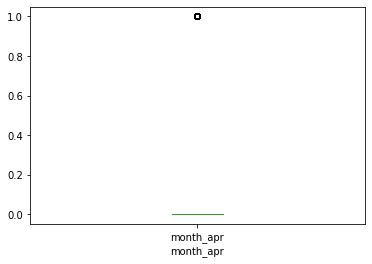

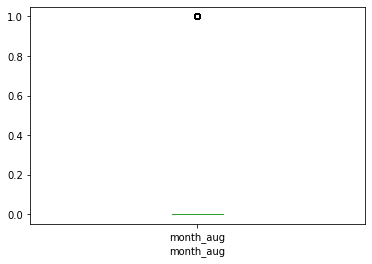

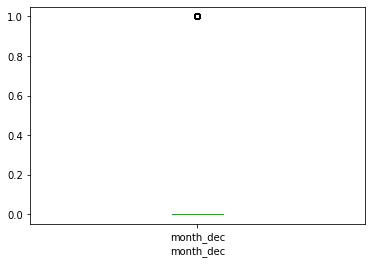

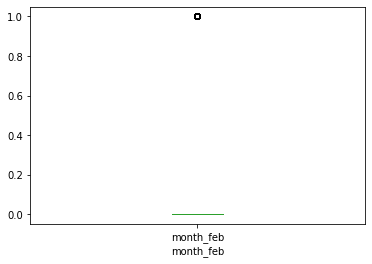

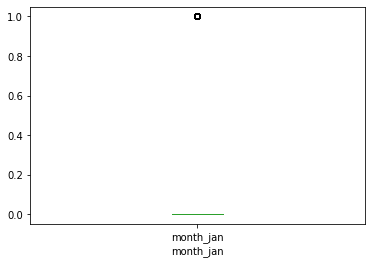

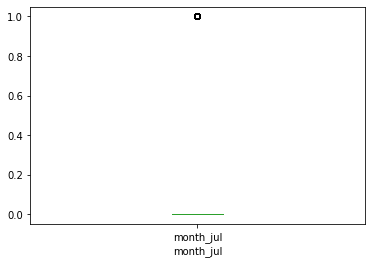

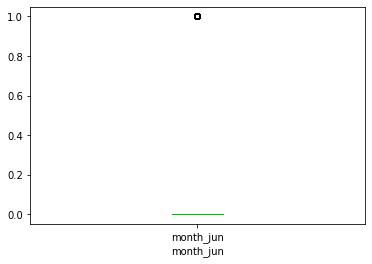

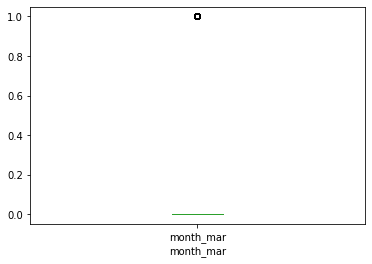

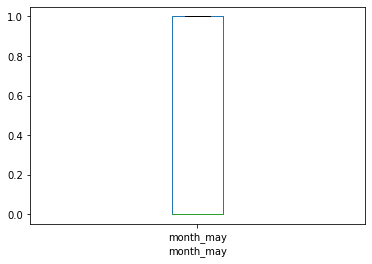

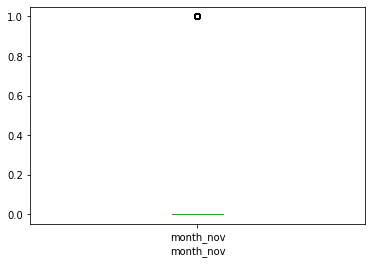

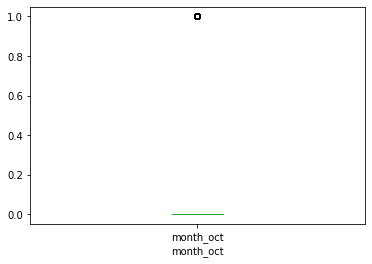

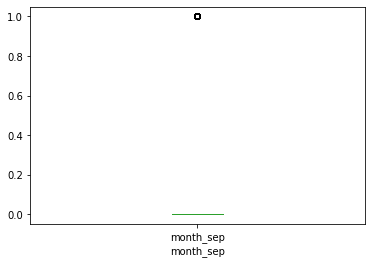

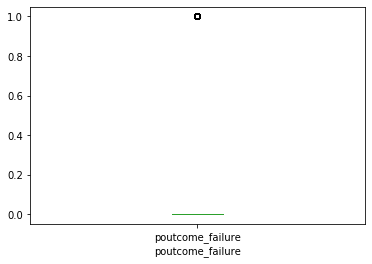

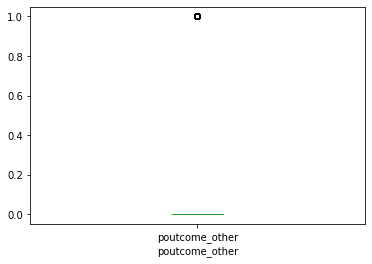

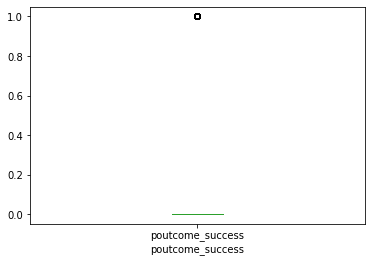

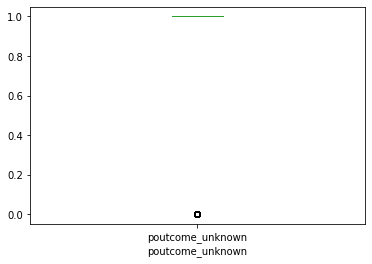

In [26]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='y':
        pass
    else:
    
        df[feature].plot.box()
        plt.xlabel(feature)
        plt.show()

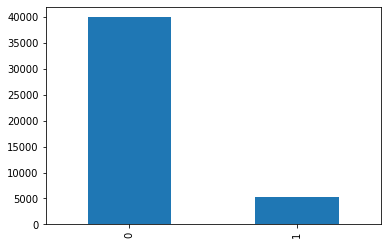

In [27]:
#checking if imbalanced dataset
df['y'].value_counts().plot.bar()

# Separating target and independent variables

In [28]:
y=df['y']
X=df.drop(['y'],axis=1)

# Applying Power transformation to remove skewness

In [29]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [30]:
df.skew()

age                     0.008605
balance                 1.098582
day                    -0.157853
duration                0.018045
campaign                0.230942
pdays                   1.645213
previous                1.646051
job_admin.              2.423369
job_blue-collar         1.385652
job_entrepreneur        5.238320
job_housemaid           5.787133
job_management          1.429986
job_retired             4.125939
job_self-employed       5.066613
job_services            2.825851
job_student             6.724846
job_technician          1.775767
job_unemployed          5.632886
job_unknown            12.409644
marital_divorced        2.411075
marital_married        -0.416493
marital_single          0.964070
education_primary       1.943716
education_secondary    -0.052795
education_tertiary      0.903300
education_unknown       4.624988
default_no             -7.245375
default_yes             7.245375
housing_no              0.224766
housing_yes            -0.224766
loan_no   

In [31]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.473637,0.414773,-1.351873,0.386077,-1.108191,-0.472533,-0.4725,-0.359369,-0.523740,-0.184415,-0.16793,1.944270,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069,-0.36078,0.813212,-0.628090,-0.422608,-1.026745,1.548892,-0.206962,0.13549,-0.13549,-0.893915,0.893915,0.436803,-0.436803,-1.35603,-0.262091,1.572395,-0.263342,-0.400409,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
1,0.429379,-0.410774,-1.351873,-0.223033,-1.108191,-0.472533,-0.4725,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,2.225121,-0.172266,-0.080069,-0.36078,-1.229691,1.592128,-0.422608,0.973952,-0.645623,-0.206962,0.13549,-0.13549,-0.893915,0.893915,0.436803,-0.436803,-1.35603,-0.262091,1.572395,-0.263342,-0.400409,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
2,-0.709873,-0.431122,-1.351873,-0.923854,-1.108191,-0.472533,-0.4725,-0.359369,-0.523740,5.422561,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069,-0.36078,0.813212,-0.628090,-0.422608,0.973952,-0.645623,-0.206962,0.13549,-0.13549,-0.893915,0.893915,-2.289359,2.289359,-1.35603,-0.262091,1.572395,-0.263342,-0.400409,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
3,0.683128,0.197685,-1.351873,-0.735678,-1.108191,-0.472533,-0.4725,-0.359369,1.909346,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,-0.080069,-0.36078,0.813212,-0.628090,-0.422608,-1.026745,-0.645623,4.831796,0.13549,-0.13549,-0.893915,0.893915,0.436803,-0.436803,-1.35603,-0.262091,1.572395,-0.263342,-0.400409,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
4,-0.709873,-0.432119,-1.351873,0.072812,-1.108191,-0.472533,-0.4725,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,-0.449414,-0.172266,12.489301,-0.36078,-1.229691,1.592128,-0.422608,-1.026745,-0.645623,4.831796,0.13549,-0.13549,1.118674,-1.118674,0.436803,-0.436803,-1.35603,-0.262091,1.572395,-0.263342,-0.400409,-0.068963,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519


# Scaling the Data

In [32]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [33]:
x.skew()

age                     0.008605
balance                 1.098582
day                    -0.157853
duration                0.018045
campaign                0.230942
pdays                   1.645213
previous                1.646051
job_admin.              2.423369
job_blue-collar         1.385652
job_entrepreneur        5.238320
job_housemaid           5.787133
job_management          1.429986
job_retired             4.125939
job_self-employed       5.066613
job_services            2.825851
job_student             6.724846
job_technician          1.775767
job_unemployed          5.632886
job_unknown            12.409644
marital_divorced        2.411075
marital_married        -0.416493
marital_single          0.964070
education_primary       1.943716
education_secondary    -0.052795
education_tertiary      0.903300
education_unknown       4.624988
default_no             -7.245375
default_yes             7.245375
housing_no              0.224766
housing_yes            -0.224766
loan_no   

# Model Building

In [51]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [53]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [54]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [55]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.8920640537910289


cross_val_score  - 0.7369133104702832


roc_auc_score  - 0.6311076521942371


Recall_score  - 0.29046898638426627


classification report
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      9981
           1       0.58      0.29      0.39      1322

    accuracy                           0.89     11303
   macro avg       0.74      0.63      0.66     11303
weighted avg       0.87      0.89      0.88     11303



[[9699  282]
 [ 938  384]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated



Accuracy_score  - 0.8990533486684951


cross_val_score  - 0.8209883696837549


roc_auc_score  - 0.6734551699666582


Recall_score  - 0.3789712556732224


classification report
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      9981
           1       0.61      0.38      0.47      1322

    accuracy                           0.90     11303
   macro avg       0.77      0.67      0.71     11303
weighted avg       0.89      0.90      0.89     11303



[[9661  320]
 [ 821  501]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





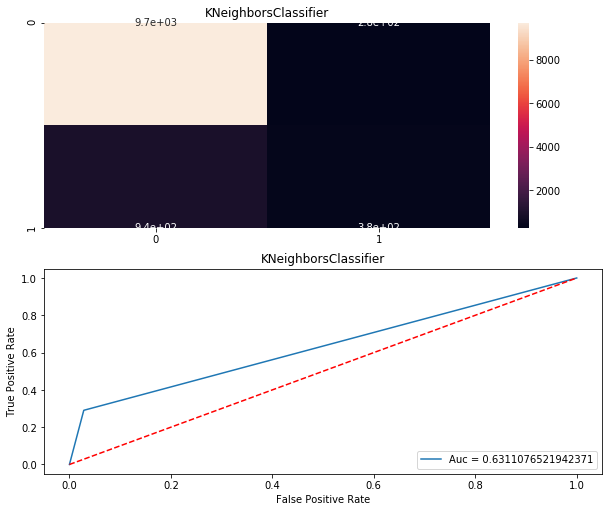

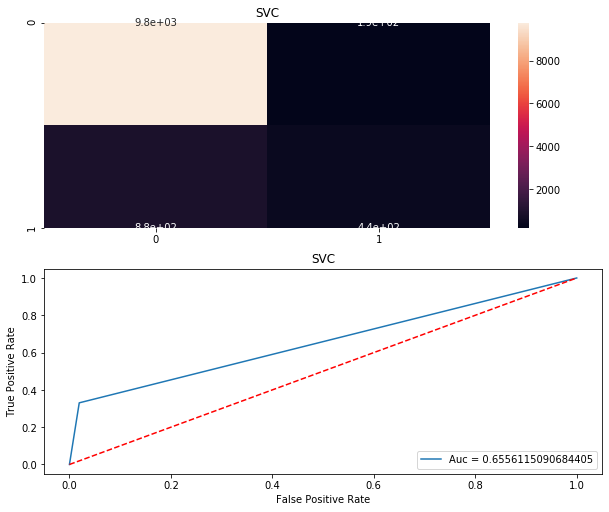

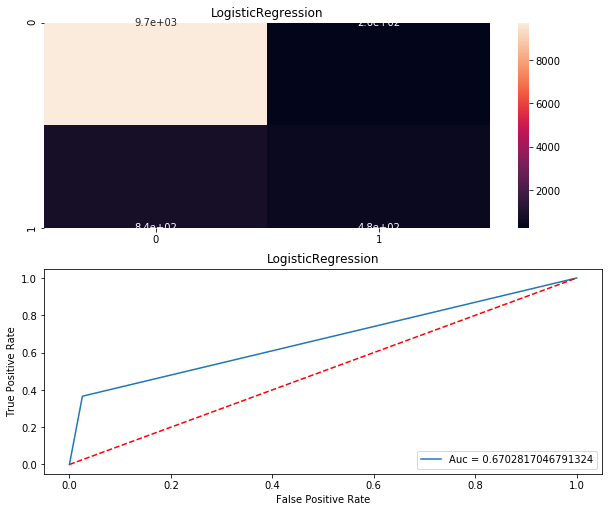

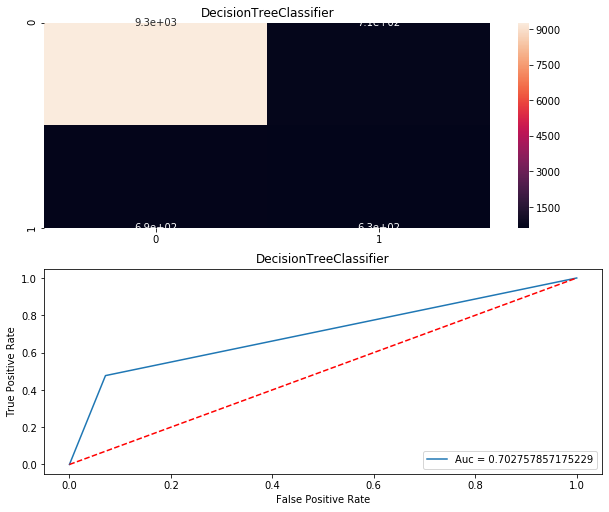

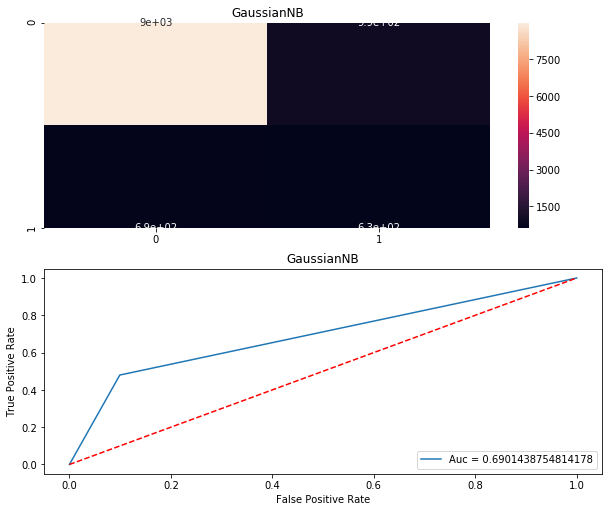

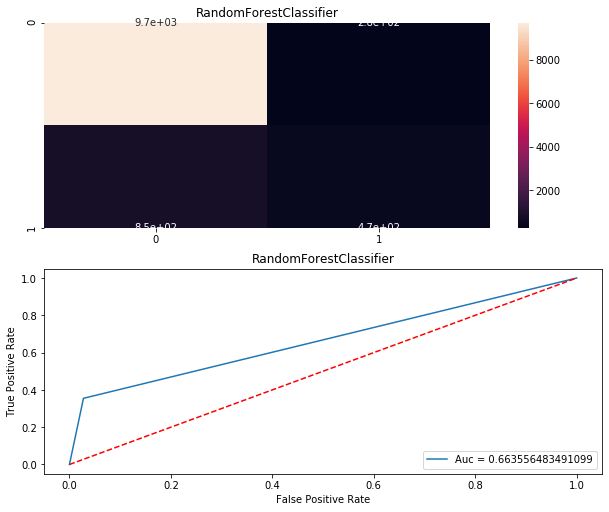

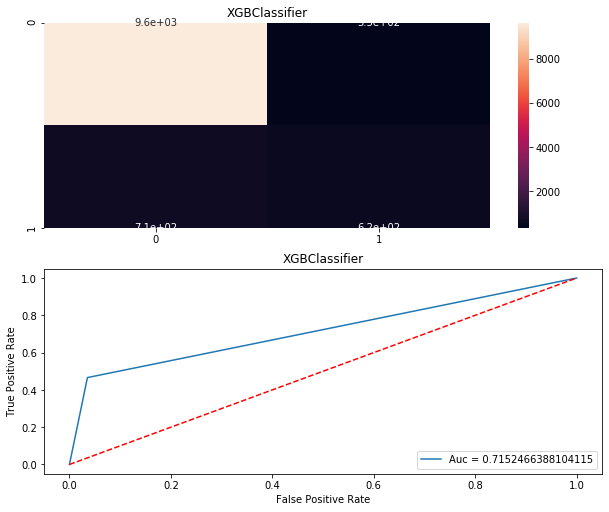

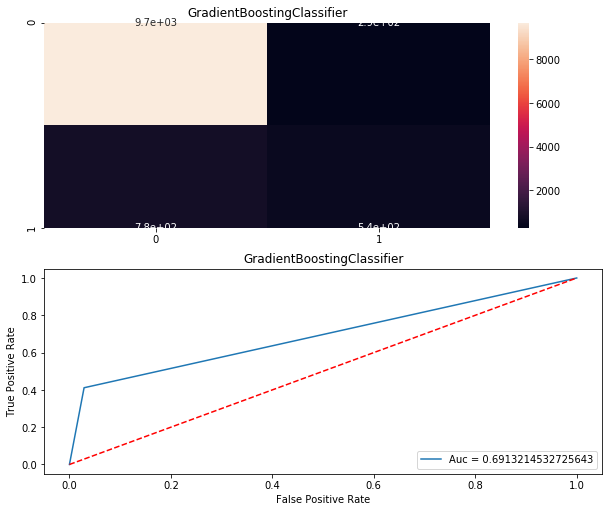

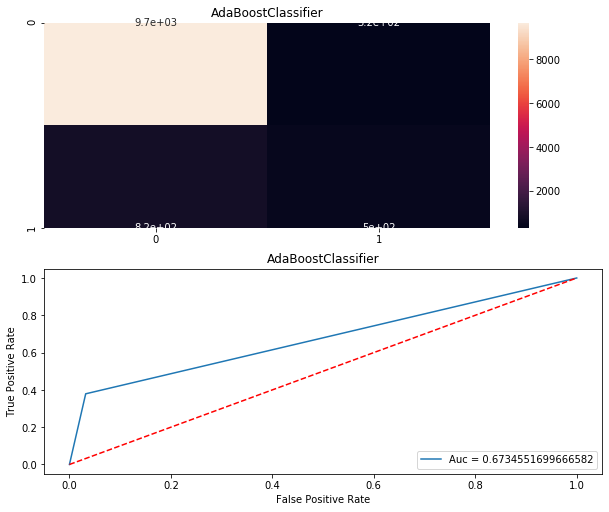

In [56]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    

In [64]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv,'auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,auc_score
0,KNeighborsClassifier,89.206405,73.691331,63.110765
1,SVC,90.462709,73.361688,65.561151
2,LogisticRegression,90.330001,81.395522,67.028170
3,DecisionTreeClassifier,87.605061,63.008059,70.275786
4,GaussianNB,85.145537,64.381553,69.014388
5,RandomForestClassifier,90.011501,74.319402,66.355648
6,XGBClassifier,90.621959,67.471446,71.524664
7,GradientBoostingClassifier,90.568876,77.402984,69.132145
8,AdaBoostClassifier,89.905335,82.098837,67.345517


In [58]:
#We can see from the table AdaBoostClassifier is the best performing Algorithm.
#Our target is 90%

In [59]:
#Hence we will apply Gridsearchcv to the top performing model and try to reach 90% score.

In [60]:
#Now lets calculate the random state of the models at which they perform the best.

In [ ]:
#not finding random_state as its run time is too high,directly we go for adaboost gridsearch and finalize adaboost.

# GridsearchCV

# 1-->AdaBoostClassifier

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)
ada=AdaBoostClassifier()

In [68]:
from sklearn.model_selection import GridSearchCV
parameters=[{'base_estimator':[lr],'learning_rate':[1,0.1,0.001],'n_estimators':[100,150,250]}]
            
gscv=GridSearchCV(ada,parameters,scoring='accuracy',n_jobs=-1,cv=5)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False), 'learning_rate': 1, 'n_estimators': 100}

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
ada=AdaBoostClassifier(base_estimator=lr,learning_rate=1,n_estimators=100)
ada.fit(x,y)
pred=ada.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.9009112624966823


In [72]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
ada=AdaBoostClassifier(base_estimator=lr,learning_rate=1,n_estimators=100)
cvs=cross_val_score(ada,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(ada,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.7975890839889397


array([[35956,  3892],
       [ 3966,  1397]], dtype=int64)

# Saving the AdaBoostClassifier final model.

In [73]:
#From all the model tried above LogistiRegression model cross_val_score is best=59.99%,
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
ada=AdaBoostClassifier(base_estimator=lr,learning_rate=1,n_estimators=100)
ada.fit(x,y)
pred=ada.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.9009112624966823


In [76]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
ada=AdaBoostClassifier(base_estimator=lr,learning_rate=1,n_estimators=100)
ada.fit(x,y)
cvs=cross_val_score(ada,x,y,scoring='accuracy',cv=5)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(ada,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.7975890839889397


array([[35956,  3892],
       [ 3966,  1397]], dtype=int64)

In [77]:
from sklearn.externals import joblib
joblib.dump(ada,'project24-Bank Marketing.obj')

['project24-Bank Marketing.obj']

In [78]:
model=joblib.load('project24-Bank Marketing.obj')

In [81]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['yes(1),no(0)'])
Final_predictions[:5]

,"yes(1),no(0)"
0,0
1,0
2,0
3,0
4,0


# Saving final predictions in file.csv format

In [84]:
Final_predictions.to_csv('E:\\final_predictionsBank Marketing',index=False)

# Conclusion:-